In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def loadData(path):
    listOfFiles = os.listdir(path='cifar-10-batches-py/')
    train = []
    train_labels = []
        
        
    print("Training files = ",listOfFiles[1:6])
    #For collecting Training data:
    for file in listOfFiles[1:6]:
        with open(path+file,'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    return dictData

In [3]:
#load the dataset
dataset = loadData(path='cifar-10-batches-py/')

Training files =  ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']


In [4]:
dataset['train_data'].shape[0]

50000

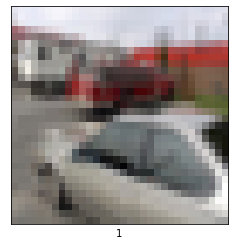

In [5]:
#visualizing train sample
temp = dataset['train_data'][49999]
label = dataset['train_labels'][49999]
# Since every row represents one example to re-map it to image we have to form three 32,32 matrix,
#representing RGB values

R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))   #for stacking all these 32,32 matrices.
plt.imshow(temp)
plt.xticks([])
plt.yticks([])
plt.xlabel(label)
plt.show()

In [6]:
X_train, y_train= dataset['train_data'],dataset['train_labels']

In [7]:
#Building the actual classifier:
#inputs will be of shape N X F where N = number of examples and F = number of features for each image.
#labels will be of size N,1. This consists of labels for all N labels from 10 classes

class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
        #to get no. of samples in train set 
        test_samples = X.shape[0]
        print("Sample Size : ",test_samples)
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance between current samples of test and train set
        for i in range(test_samples):
            
            print("Test example = ",i,end="\r")
            #label_count is array of zeros used to store the count for each class while comparing neighbours
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)   #take the absolute sum horizontally across columns
            
            
            #idx will contain k smallest indices at the start of the list
            #this is called partial sorting for more information look: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
            #min_ind will help us to slice through k indices which have minimum distance
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #This for loop iterates over min_ind and find the label present in train-set_Y for x
            #and increase the count at that particular index whenever any label is repeated.
            #Max value at any index is returned using np.argmax() and stored at ith index of Ypred i.e. predicted values
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred



In [8]:
#Splitting the data into 5 equal folds
num_folds = 5
num_training = 50000

k_choices = [1,2,3,4,5]

# Check that training set can be equally divided into num_folds portions
if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

# Split training set into num_folds lists
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

# Perform k-fold cross validation to find the best value of k
# Loop over num_folds in outer loop to reuse computed distances for all values of k
for k in k_choices:
    k_to_accuracies[k] = []
    
for idx in range(num_folds):
    print("Fold :", idx)
    # Use bin with index idx as validation set, rest as training set 
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]
    # Train kNN classifier
    knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set)

    
    for k in k_choices:
        print("For k = ",k,end="\n")
        # Predict labels for validation set
        y_validation_pred = knn.predict(X_validation_set,k)
        # Check accuracy for validation set
        # making keen use of vectorization allows us to write our classification accuracy function in a single line of code. 
        #for more information look: https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Problems/ComputeAccuracy.html
        accuracy = np.mean(y_validation_pred==y_validation_set)
        k_to_accuracies[k].append(accuracy)
        print("\n")


Fold : 0
For k =  1
Sample Size :  10000
Test example =  9999

For k =  2
Sample Size :  10000
Test example =  9999

For k =  3
Sample Size :  10000
Test example =  9999

For k =  4
Sample Size :  10000
Test example =  9999

For k =  5
Sample Size :  10000
Test example =  9999

Fold : 1
For k =  1
Sample Size :  10000
Test example =  9999

For k =  2
Sample Size :  10000
Test example =  9999

For k =  3
Sample Size :  10000
Test example =  9999

For k =  4
Sample Size :  10000
Test example =  9999

For k =  5
Sample Size :  10000
Test example =  9999

Fold : 2
For k =  1
Sample Size :  10000
Test example =  9999

For k =  2
Sample Size :  10000
Test example =  9999

For k =  3
Sample Size :  10000
Test example =  9999

For k =  4
Sample Size :  10000
Test example =  9999

For k =  5
Sample Size :  10000
Test example =  9999

Fold : 3
For k =  1
Sample Size :  10000
Test example =  9999

For k =  2
Sample Size :  10000
Test example =  9999

For k =  3
Sample Size :  10000
Test example =

In [9]:
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.261400
k = 1, accuracy = 0.259800
k = 1, accuracy = 0.252200
k = 1, accuracy = 0.261200
k = 1, accuracy = 0.262300
k = 2, accuracy = 0.237500
k = 2, accuracy = 0.240100
k = 2, accuracy = 0.228400
k = 2, accuracy = 0.240600
k = 2, accuracy = 0.236200
k = 3, accuracy = 0.254000
k = 3, accuracy = 0.252200
k = 3, accuracy = 0.244500
k = 3, accuracy = 0.251200
k = 3, accuracy = 0.259100
k = 4, accuracy = 0.267200
k = 4, accuracy = 0.256800
k = 4, accuracy = 0.252800
k = 4, accuracy = 0.261900
k = 4, accuracy = 0.265300
k = 5, accuracy = 0.270400
k = 5, accuracy = 0.259200
k = 5, accuracy = 0.257200
k = 5, accuracy = 0.263200
k = 5, accuracy = 0.268700


k = 1, average accuracy = 0.259380
k = 2, average accuracy = 0.236560
k = 3, average accuracy = 0.252200
k = 4, average accuracy = 0.260800
k = 5, average accuracy = 0.263740


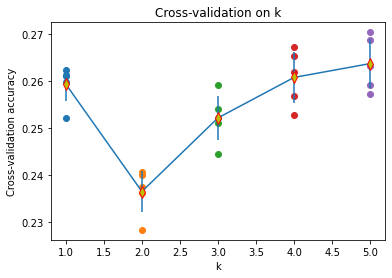

In [10]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std,marker='d',ms='8',mfc='y', mec='r')
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()